# Práctica 6

Bibliotecas que les pueden ser útiles para el desarrollo de la práctica.

In [8]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.pylabtools import figsize
import ipywidgets as widgets
colores = ["#BD3495", "#7EBD34","#BD3450"]
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import numpy.random as rnd
from sympy import var
from sympy.plotting import plot_implicit
from IPython import display

## Ejercicio 1:

1. Dados los datos siguientes, elegir las caracteristicas necesarias para ajustar una curva de regreción.

|  x  |  y  |
|-----|-----|
| 0.1 |-0.01|
|1.05 |0.978|
|2.01 | 1.4 |
|3.003|1.74 |
|4.11 | 2.1 |
|4.99 | 2.3 |
|5.89 | 2.5 |

    a) Gráficar los datos. ¿Qué tipo de curva $y=\theta f(x)$ tiene un comportamiento semejante a la gráfica 
    obtenida? (e.g. exponencial, coseno, logaritmo, etc.)

Primero grafiquemos los datos que nos dan.

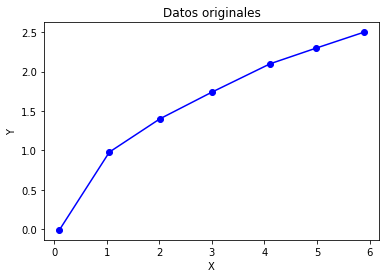

In [42]:
x = np.array([[0.1], [1.05], [2.01], [3.003], [4.11], [4.99], [5.89]])
y = np.array([[-0.01], [0.978], [1.4], [1.74], [2.1], [2.3], [2.5]])

plt.title("Datos originales")
plt.scatter(x, y, c="blue")
plt.plot(x, y, c="blue")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Ahora viendo la grafica anterior podemos ver que tiene cierto parecido con la raiz.

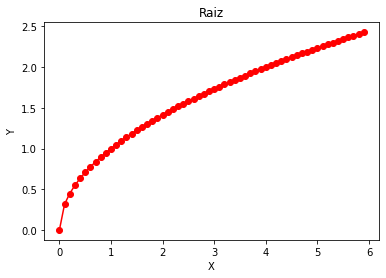

In [97]:
raiz = np.arange(0.0, 6.0, 0.1)

plt.figure(1)
plt.title("Raiz")
plt.scatter(raiz, np.sqrt(raiz), c='red')
plt.plot(raiz, np.sqrt(raiz), c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Y comparandolas podemos ver que su creciemiento es muy parecido.

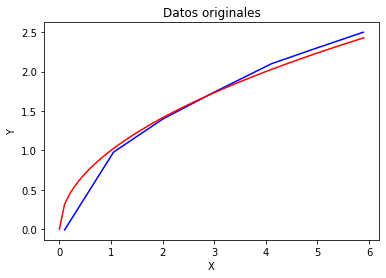

In [98]:
x = np.array([[0.1], [1.05], [2.01], [3.003], [4.11], [4.99], [5.89]])
y = np.array([[-0.01], [0.978], [1.4], [1.74], [2.1], [2.3], [2.5]])
raiz = np.arange(0.0, 6.0, 0.1)

plt.title("Datos originales")
plt.plot(x, y, c="blue")
plt.plot(raiz, np.sqrt(raiz), c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

    b)Generar nuevas caracteristicas $y=\theta f(x)$ usando la $f(x)$ identificada anteriormente. Calcula los 
    valores correspondientes para las nuevas $x'$.

In [37]:
xPrima = np.sqrt(x)
print("Nuevas valores aplicandole raiz a los valores de x (raiz(x) = x').")
print(" |    x'    |")
print(" ------------")
print(xPrima)

Nuevas valores aplicandole raiz a los valores de x (raiz(x) = x').
 |    x'    |
 ------------
[[0.31622777]
 [1.02469508]
 [1.41774469]
 [1.73291662]
 [2.02731349]
 [2.23383079]
 [2.42693222]]


    c) Gráficar los datos $(x',y)$ con las caracteristicas $x'$ elegidas.

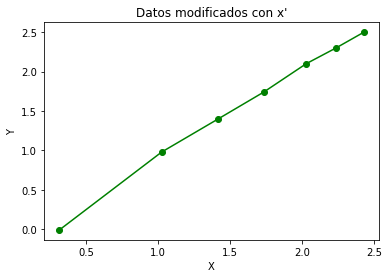

In [66]:
xPrima = np.sqrt(x)
plt.title("Datos modificados con x'")
plt.scatter(xPrima, y, c="green")
plt.plot(xPrima, y, c="green")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

    d) Ajustar el plano/recta en el espacio trandormado $y$ vs $x'$ utilizando la ecuación normal 
    $\theta = (X^T X)^{-1}X^T Y$.

In [102]:
xAux = np.array([[1.0, 0.31622777], [1.0, 1.02469508], [1.0, 1.41774469], [1.0, 1.73291662], 
                [1.0, 2.02731349], [1.0, 2.23383079], [1.0, 2.42693222]])
transPrima = xAux.T #x^t
prod = np.dot(transPrima, xAux) # (x^t*x)
inv = np.linalg.inv(prod) # (x^t*x)^(-1)
prod2 = np.dot(inv, transPrima) #((x^t*x)^(-1)(x^t))
prod3 = np.dot(prod2, y) #((x^t*x)^(-1)(x^t))(y)
print(" |   theta   |")
print(" -------------")
print(prod3)

 |   theta   |
 -------------
[[-0.30673128]
 [ 1.1767011 ]]


    e) Calcular la expresión correspondiente en el espacio original (sustituir las $x'$ por la función que 
    representan $f(x)$).

In [88]:
nuevaY = -0.30673128 + 1.1767011 * xPrima
print(nuevaY)

[[0.06537428]
 [0.89902854]
 [1.36153045]
 [1.73239361]
 [2.07881074]
 [2.32181987]
 [2.54904253]]


    f) Gráficar la función ajustada en el espació original $y$ vs $x$.

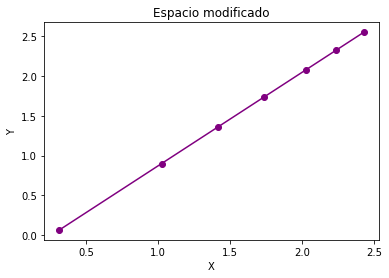

In [90]:
nuevaY = -0.30673128 + 1.1767011 * xPrima # h_theta(x) = theta_0 + (theta_1 * x')
plt.title("Espacio modificado")
plt.scatter(xPrima, nuevaY, c="purple")
plt.plot(xPrima, nuevaY, c="purple")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 2 Clasificación.

2. Entrene un clasificador utilizando descenso por el gradiente para detectar la frontera entre los datos siguientes.

|       x       |       y       | clasificación |
|---------------|---------------|---------------|
| -0.6861007046 | -2.7317977268 |     FALSO     |
|  0.1945728382 |  0.451296404  |   VERDADERO   |
| -2.3158346172 | -0.6509207096 |     FALSO     |
| -1.0254515503 | -0.0809364635 |   VERDADERO   |
|  0.4311453719 |  0.8026880194 |   VERDADERO   |
| -3.7719061095 |  0.814367149  |     FALSO     |
|  0.8427785188 | -1.0716033783 |   VERDADERO   |
|  2.2864584569 | -2.9176860601 |     FALSO     |
| -0.2791914176 | -0.8346607406 |   VERDADERO   |
| -0.9005654622 | -2.2787579969 |     FALSO     |
|  0.1421184987 | -1.213108765  |   VERDADERO   |
|  3.1509795878 | -3.7415509261 |     FALSO     |
|  0.6174679771 | -0.5790232979 |   VERDADERO   |
|  2.0068530366 | -1.4894149248 |     FALSO     |
|  3.5943855252 | -0.8032932784 |     FALSO     |

In [103]:
def plot_transformed(X, Y, Theta):
    '''
    Función auxiliar para visualizar la curva descrita por los pesos.
    Parámetros:
    X: Valores de entreada.
    Y: Etiquetas de los valores.
    Theta: Pesos actuales del entrenamiento.
    '''
    Theta = Theta.ravel()
    print("Parámetros iniciales. Theta = ", Theta)
    var('x y')
    p = plot_implicit(Theta[0] + Theta[1] * x + Theta[2] * y + Theta[3] *x*y + Theta[4] * x**2 + Theta[5] * y**2, x, y,
                      title = "Frontera", show=False)
    p.show()
    backend = p._backend
    axes = backend.fig.get_axes()[0]
    c = np.vectorize(lambda b: colores[b])(Y.ravel())
    axes.scatter(X[:,0], X[:,1], color=c)
    return backend.fig

    a) Gráficar los datos.

Los valores en rojos estan marcado como falso y los azules como verdadero *


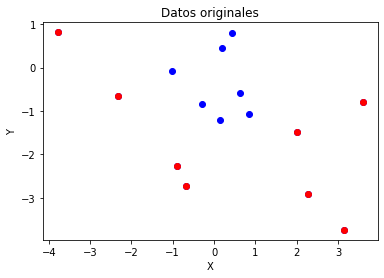

In [180]:
x = np.array([[-0.6861007046], [0.1945728382], [-2.3158346172], [-1.0254515503], 
                [0.4311453719], [-3.7719061095], [0.8427785188], [2.2864584569],
                [-0.2791914176], [-0.9005654622], [0.1421184987], [3.1509795878],
                [0.6174679771], [2.0068530366], [3.5943855252]])
y = np.array([[-2.7317977268], [0.451296404], [-0.6509207096], [-0.0809364635], 
                [0.8026880194], [0.814367149], [-1.0716033783], [-2.9176860601],
                [-0.8346607406], [-2.2787579969], [-1.213108765], [-3.7415509261],
                [-0.5790232979], [-1.4894149248], [-0.8032932784]])

xAux = np.array([[-0.6861007046], [-2.3158346172], [-3.7719061095], [2.2864584569], 
                [-0.9005654622], [3.1509795878], [2.0068530366], [3.5943855252]])
yAux = np.array([[-2.7317977268], [-0.6509207096], [0.814367149], [-2.9176860601], 
                [-2.2787579969], [-3.7415509261], [-1.4894149248], [-0.8032932784]])

print("Los valores en rojos estan marcado como falso y los azules como verdadero *")
plt.title("Datos originales")
plt.scatter(x, y, c="blue")
plt.scatter(xAux, yAux, c="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

    b) Listar características derivadas correspondientes a todos términos de un polinomio de segundo grado y 
    calcular sus valores.

In [195]:
"""
Observacion: Algo que no me quedo muy claro es por que decimos que deribamos
si en realidad lo que hacemos es transformar x & y
"""
x2 = x ** 2
y2 = y ** 2
xyAux = x[:, 0] * y[:, 0]
xy = xyAux.reshape((15, 1))

print(" |x derivada:|")
print(" -------------")
print(x2)
print("\n |y deribada:|")
print(" -------------")
print(y2)
print("\n |Producto de xy:|")
print(" -------------")
print(xy)

 |x derivada:|
 -------------
[[ 0.47073418]
 [ 0.03785859]
 [ 5.36308997]
 [ 1.05155088]
 [ 0.18588633]
 [14.2272757 ]
 [ 0.71027563]
 [ 5.22789228]
 [ 0.07794785]
 [ 0.81101815]
 [ 0.02019767]
 [ 9.92867236]
 [ 0.3812667 ]
 [ 4.02745911]
 [12.9196073 ]]

 |y deribada:|
 -------------
[[7.46271882e+00]
 [2.03668444e-01]
 [4.23697770e-01]
 [6.55071112e-03]
 [6.44308056e-01]
 [6.63193853e-01]
 [1.14833380e+00]
 [8.51289195e+00]
 [6.96658552e-01]
 [5.19273801e+00]
 [1.47163288e+00]
 [1.39992033e+01]
 [3.35267980e-01]
 [2.21835682e+00]
 [6.45280091e-01]]

 |Producto de xy:|
 -------------
[[  1.87428835]
 [  0.08781002]
 [  1.50742471]
 [  0.08299642]
 [  0.34607522]
 [ -3.07171642]
 [ -0.90312431]
 [ -6.67116797]
 [  0.23303012]
 [  2.05217075]
 [ -0.1724052 ]
 [-11.78955059]
 [ -0.35752834]
 [ -2.98903686]
 [ -2.88734573]]


    c) Ajustar el plano en el espacio transformado. Observe que no se pide gráficarlo pues este espacio tiene 
    demaciadas dimensiones.

In [197]:
def sigmoide(M):
    return 1 / (1 + np.exp(-M))

xCanon = np.column_stack((x, xy, x2, y2))

y = np.array([y.ravel()]).T
theta = np.array([x_canonica[1]]).T
itera = 10000
errores = np.zeros(itera)

def descenso(Theta, iteraciones):
    alpha = 0.05
    xCan = xCanon
    yCan = y
    for i in range(0, iteraciones):
        H = sigmoide(np.dot(xCan,Theta))
        errores[i] = - np.sum(y * np.log(H) + (1 - y) * np.log(1 - H))
        gradiente = np.dot(xCan.T, H - yCan) / xCan.size
        Theta = Theta - alpha * gradiente
    return Theta

print("Plano ajustado:\n")
print(xCanon)

Plano ajustado:

[[-6.86100705e-01  1.87428835e+00  4.70734177e-01  7.46271882e+00]
 [ 1.94572838e-01  8.78100222e-02  3.78585894e-02  2.03668444e-01]
 [-2.31583462e+00  1.50742471e+00  5.36308997e+00  4.23697770e-01]
 [-1.02545155e+00  8.29964220e-02  1.05155088e+00  6.55071112e-03]
 [ 4.31145372e-01  3.46075225e-01  1.85886332e-01  6.44308056e-01]
 [-3.77190611e+00 -3.07171642e+00  1.42272757e+01  6.63193853e-01]
 [ 8.42778519e-01 -9.03124308e-01  7.10275632e-01  1.14833380e+00]
 [ 2.28645846e+00 -6.67116797e+00  5.22789228e+00  8.51289195e+00]
 [-2.79191418e-01  2.33030115e-01  7.79478477e-02  6.96658552e-01]
 [-9.00565462e-01  2.05217075e+00  8.11018152e-01  5.19273801e+00]
 [ 1.42118499e-01 -1.72405196e-01  2.01976677e-02  1.47163288e+00]
 [ 3.15097959e+00 -1.17895506e+01  9.92867236e+00  1.39992033e+01]
 [ 6.17467977e-01 -3.57528344e-01  3.81266703e-01  3.35267980e-01]
 [ 2.00685304e+00 -2.98903686e+00  4.02745911e+00  2.21835682e+00]
 [ 3.59438553e+00 -2.88734573e+00  1.29196073

    d) Calcular la expresión correspondiente en el espacio original.

In [202]:
thetas = descenso(theta, itera)
print("|Coeficientes de", chr(952), ":|")
print("---------------------")
print(thetas)

C:\Users\jamyn\AppData\Local\Temp/ipykernel_528/1410512287.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-M))
C:\Users\jamyn\AppData\Local\Temp/ipykernel_528/1410512287.py:17: RuntimeWarning: divide by zero encountered in log
  errores[i] = - np.sum(y * np.log(H) + (1 - y) * np.log(1 - H))


|Coeficientes de θ :|
---------------------
[[-188.62540941]
 [ 488.16648287]
 [-540.11457271]
 [-968.03596351]]


    e) Gráficar la curva ajustada en el espacio original.

IndexError: index 4 is out of bounds for size 4

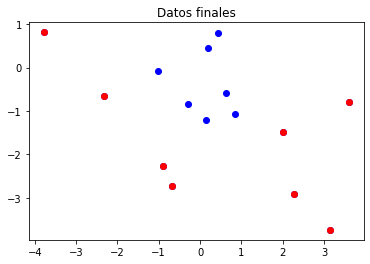

In [204]:
def circulo(X, Y, thet):
    return thet.item(0) + thet.item(1)*X + thet.item(2)*Y + thet.item(3)*(X*Y) + thet.item(4)*(X**2) + thet.item(5)*(Y**2)   

plt.title("Datos finales")
plt.scatter(x, y, c="blue")
plt.scatter(xAux, yAux, c="red")
x = np.linspace(-5,5,500)
y = np.linspace(-4,4,400)
x,y = np.meshgrid(x,y)
z = circulo(x,y,theta)
plt.contour(x,y,z, levels = [0])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()